In [ ]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# ignore the warning messages
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis (EDA)

***Titanic Dataset:***

*   **PassengerId**

*   **Pclass:**	Ticket class. A proxy for socio-economic status (SES).
                 1 = 1st (Upper)
                 2 = 2nd (Middle)
                 3 = 3rd (Lower)

*   **Name**

*   **Sex**

*   **Age:**	Age in years. Age is fractional if less than 1. If the age is estimated, is it in the form of **xx.5**	.

*   **SibSp:**	number of siblings / spouses aboard the Titanic. The dataset defines family relations in this way:

                 Sibling = brother, sister, stepbrother, stepsister
                 Spouse = husband, wife (mistresses and fiancés were ignored)


*   **Parch:**	number of parents / children aboard the Titanic. The dataset defines family relations in this way:
                 Parent = mother, father
                 Child = daughter, son, stepdaughter, stepson
                 [Some children travelled only with a nanny, therefore parch=0 for them.]

*   **Ticket:**	Ticket number

*   **Fare:**	Passenger fare

*   **Cabin:**	Cabin number

*   **Embarked:**	Port of Embarkation
                 C = Cherbourg
                 Q = Queenstown
                 S = Southampton

*   **Survived:**	Survival Status
                 0 = No
                 1 = Yes


In [ ]:
# read dataset from a Google Drive File

file_link = 'https://drive.google.com/file/d/1wADS0ybifgQJcPEtzqDurKAi_CEmwKDF/view?usp=sharing' # the file access must have to be Public

# get the id part of the file
id = file_link.split("/")[-2]
# print(id)

# creating a new link using the id so that we can easily read the csv file in pandas
new_link = f'https://drive.google.com/uc?id={id}'
print(new_link)
df = pd.read_csv(new_link)

# let's look at the first few instances
df.head()

https://drive.google.com/uc?id=1wADS0ybifgQJcPEtzqDurKAi_CEmwKDF


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889,891.000000
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,NaN
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S,NaN
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,NaN
mean,446.000000,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,0.383838
std,257.353842,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,0.486592
min,1.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,223.500000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,0.000000
50%,446.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000
75%,668.500000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,1.000000


In [ ]:
# Check Unique Values
df.nunique()

,0
PassengerId,891
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248
Cabin,147


In [ ]:
# Check for missing values
df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [ ]:
#check the cat and num column name
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical Variables:
['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']


Survived
0    549
1    342
Name: count, dtype: int64


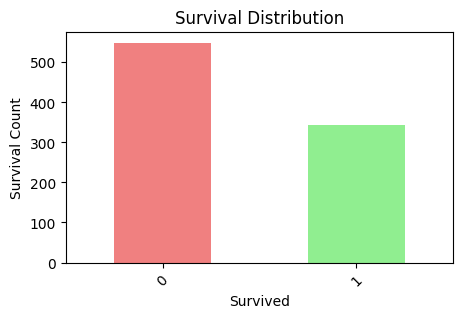

In [ ]:
# Visualize the distribution of the 'Survived' variable

print(df.value_counts('Survived'))

plt.figure(figsize=(5, 3))
df['Survived'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Survival Count')
plt.xticks(rotation = 45)
plt.show()

Pclass
1    216
2    184
3    491
Name: count, dtype: int64


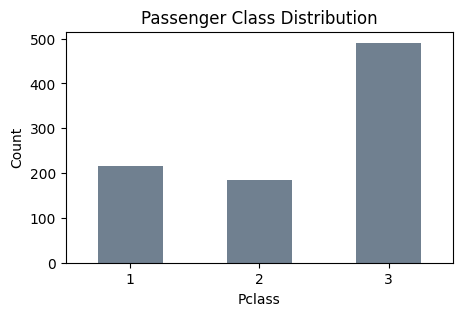

In [ ]:
# Visualize the distribution of 'Pclass' variable
print(df.value_counts('Pclass').sort_index())

plt.figure(figsize=(5, 3))
df['Pclass'].value_counts().sort_index().plot(kind='bar', color='slategrey')
plt.title('Passenger Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Sex
male      577
female    314
Name: count, dtype: int64


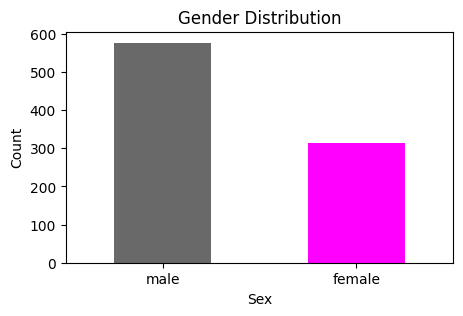

In [ ]:
# Visualize the distribution of 'Sex' variable
print(df.value_counts('Sex'))

plt.figure(figsize=(5, 3))
df['Sex'].value_counts().plot(kind='bar', color=['dimgray', 'magenta'])
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

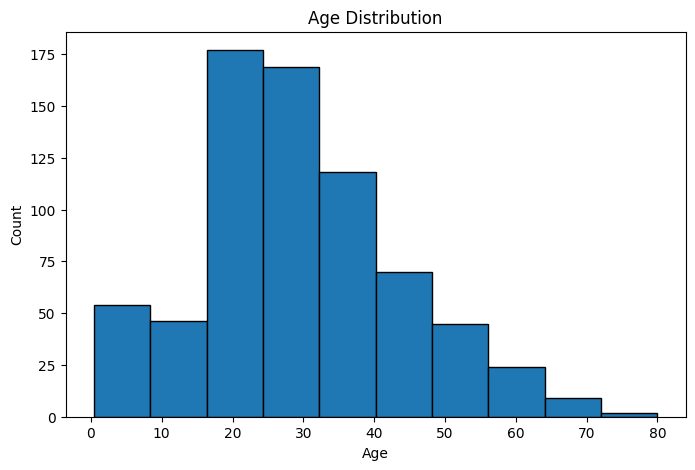

In [ ]:
# Visualize the distribution of 'Age' variable
plt.figure(figsize=(8, 5))
plt.hist(df['Age'].dropna(), edgecolor='black')
# dropna eliminates the null/missing values but not in df
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<Figure size 600x400 with 0 Axes>

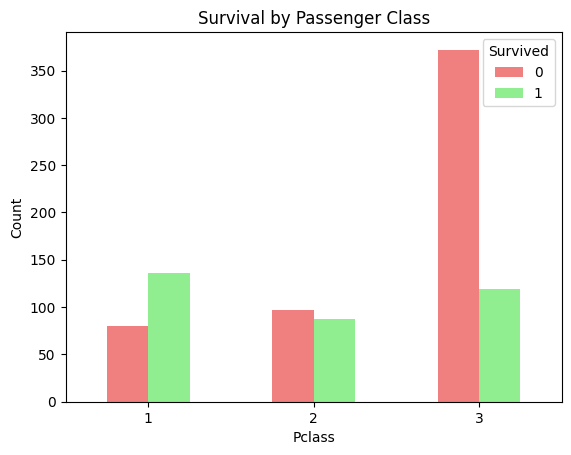

In [ ]:
# Visualize the relationship between 'Pclass' and 'Survived'

plt.figure(figsize=(6, 4))
pd.crosstab(df['Pclass'], df['Survived']).plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Survival by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

<Figure size 600x400 with 0 Axes>

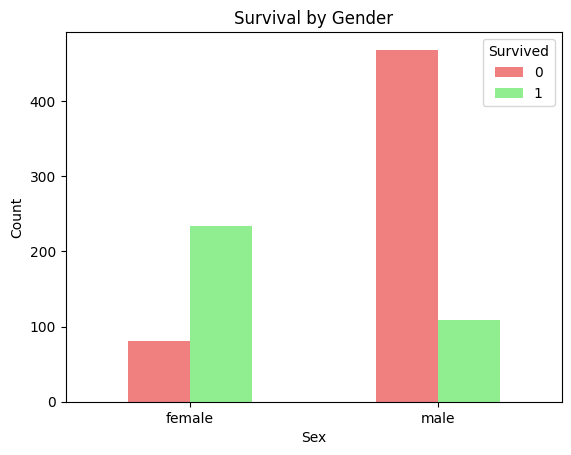

In [ ]:
# Visualize the relationship between 'Sex' and 'Survived'
plt.figure(figsize=(6, 4))
pd.crosstab(df['Sex'], df['Survived']).plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Survival by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

             PassengerId    Pclass       Age     SibSp     Parch      Fare  \
PassengerId     1.000000 -0.035144  0.036847 -0.057527 -0.001652  0.012658   
Pclass         -0.035144  1.000000 -0.369226  0.083081  0.018443 -0.549500   
Age             0.036847 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
SibSp          -0.057527  0.083081 -0.308247  1.000000  0.414838  0.159651   
Parch          -0.001652  0.018443 -0.189119  0.414838  1.000000  0.216225   
Fare            0.012658 -0.549500  0.096067  0.159651  0.216225  1.000000   
Survived       -0.005007 -0.338481 -0.077221 -0.035322  0.081629  0.257307   

             Survived  
PassengerId -0.005007  
Pclass      -0.338481  
Age         -0.077221  
SibSp       -0.035322  
Parch        0.081629  
Fare         0.257307  
Survived     1.000000  


<Figure size 800x600 with 0 Axes>

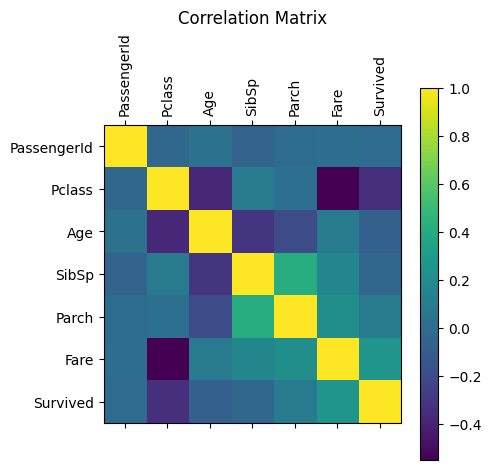

In [ ]:
# Correlation matrix plot
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)
plt.matshow(correlation_matrix)
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

# Data Preprocessing

In [ ]:
# Drop redundant features
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1) #axis=1 is column, 0 is row
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0
887,1,female,19.0,0,0,30.0000,S,1
888,3,female,NaN,1,2,23.4500,S,0
889,1,male,26.0,0,0,30.0000,C,1


In [ ]:
# Drop duplicates
df = df.drop_duplicates()
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,Q,0
887,1,female,19.0,0,0,30.0000,S,1
888,3,female,NaN,1,2,23.4500,S,0
889,1,male,26.0,0,0,30.0000,C,1


In [ ]:
# Handle missing values in the column "Age" by replacing with the mean value
df['Age'].fillna(df['Age'].mean(), inplace = True) #changing df permanently
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.000000,1,0,7.2500,S,0
1,1,female,38.000000,1,0,71.2833,C,1
2,3,female,26.000000,0,0,7.9250,S,1
3,1,female,35.000000,1,0,53.1000,S,1
4,3,male,35.000000,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
885,3,female,39.000000,0,5,29.1250,Q,0
887,1,female,19.000000,0,0,30.0000,S,1
888,3,female,29.812751,1,2,23.4500,S,0
889,1,male,26.000000,0,0,30.0000,C,1


In [ ]:
# Drop rows with missing values
df.dropna(subset=['Embarked'], inplace=True)
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.000000,1,0,7.2500,S,0
1,1,female,38.000000,1,0,71.2833,C,1
2,3,female,26.000000,0,0,7.9250,S,1
3,1,female,35.000000,1,0,53.1000,S,1
4,3,male,35.000000,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
885,3,female,39.000000,0,5,29.1250,Q,0
887,1,female,19.000000,0,0,30.0000,S,1
888,3,female,29.812751,1,2,23.4500,S,0
889,1,male,26.000000,0,0,30.0000,C,1


In [ ]:
df.shape

(778, 8)

In [ ]:
df.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
Survived,0


In [ ]:
# Convert categorical variables to numerical (one-hot encoding)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])
df

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,False,True,False,False,True
1,1,38.000000,1,0,71.2833,1,True,False,True,False,False
2,3,26.000000,0,0,7.9250,1,True,False,False,False,True
3,1,35.000000,1,0,53.1000,1,True,False,False,False,True
4,3,35.000000,0,0,8.0500,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
885,3,39.000000,0,5,29.1250,0,True,False,False,True,False
887,1,19.000000,0,0,30.0000,1,True,False,False,False,True
888,3,29.812751,1,2,23.4500,0,True,False,False,False,True
889,1,26.000000,0,0,30.0000,1,False,True,True,False,False


In [ ]:
df.shape

(778, 11)

# Implementing Decision Tree and Random Forest Using Scikit-learn Library

In [ ]:
# Split the data into 80-20 train-test split

X = df.drop(['Survived'], axis=1) # features
y = df['Survived'] # target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# display the shapes

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (622, 10)
X_test shape: (156, 10)
y_train shape: (622,)
y_test shape: (156,)


Decision Tree Classifier Accuracy: 0.7692307692307693


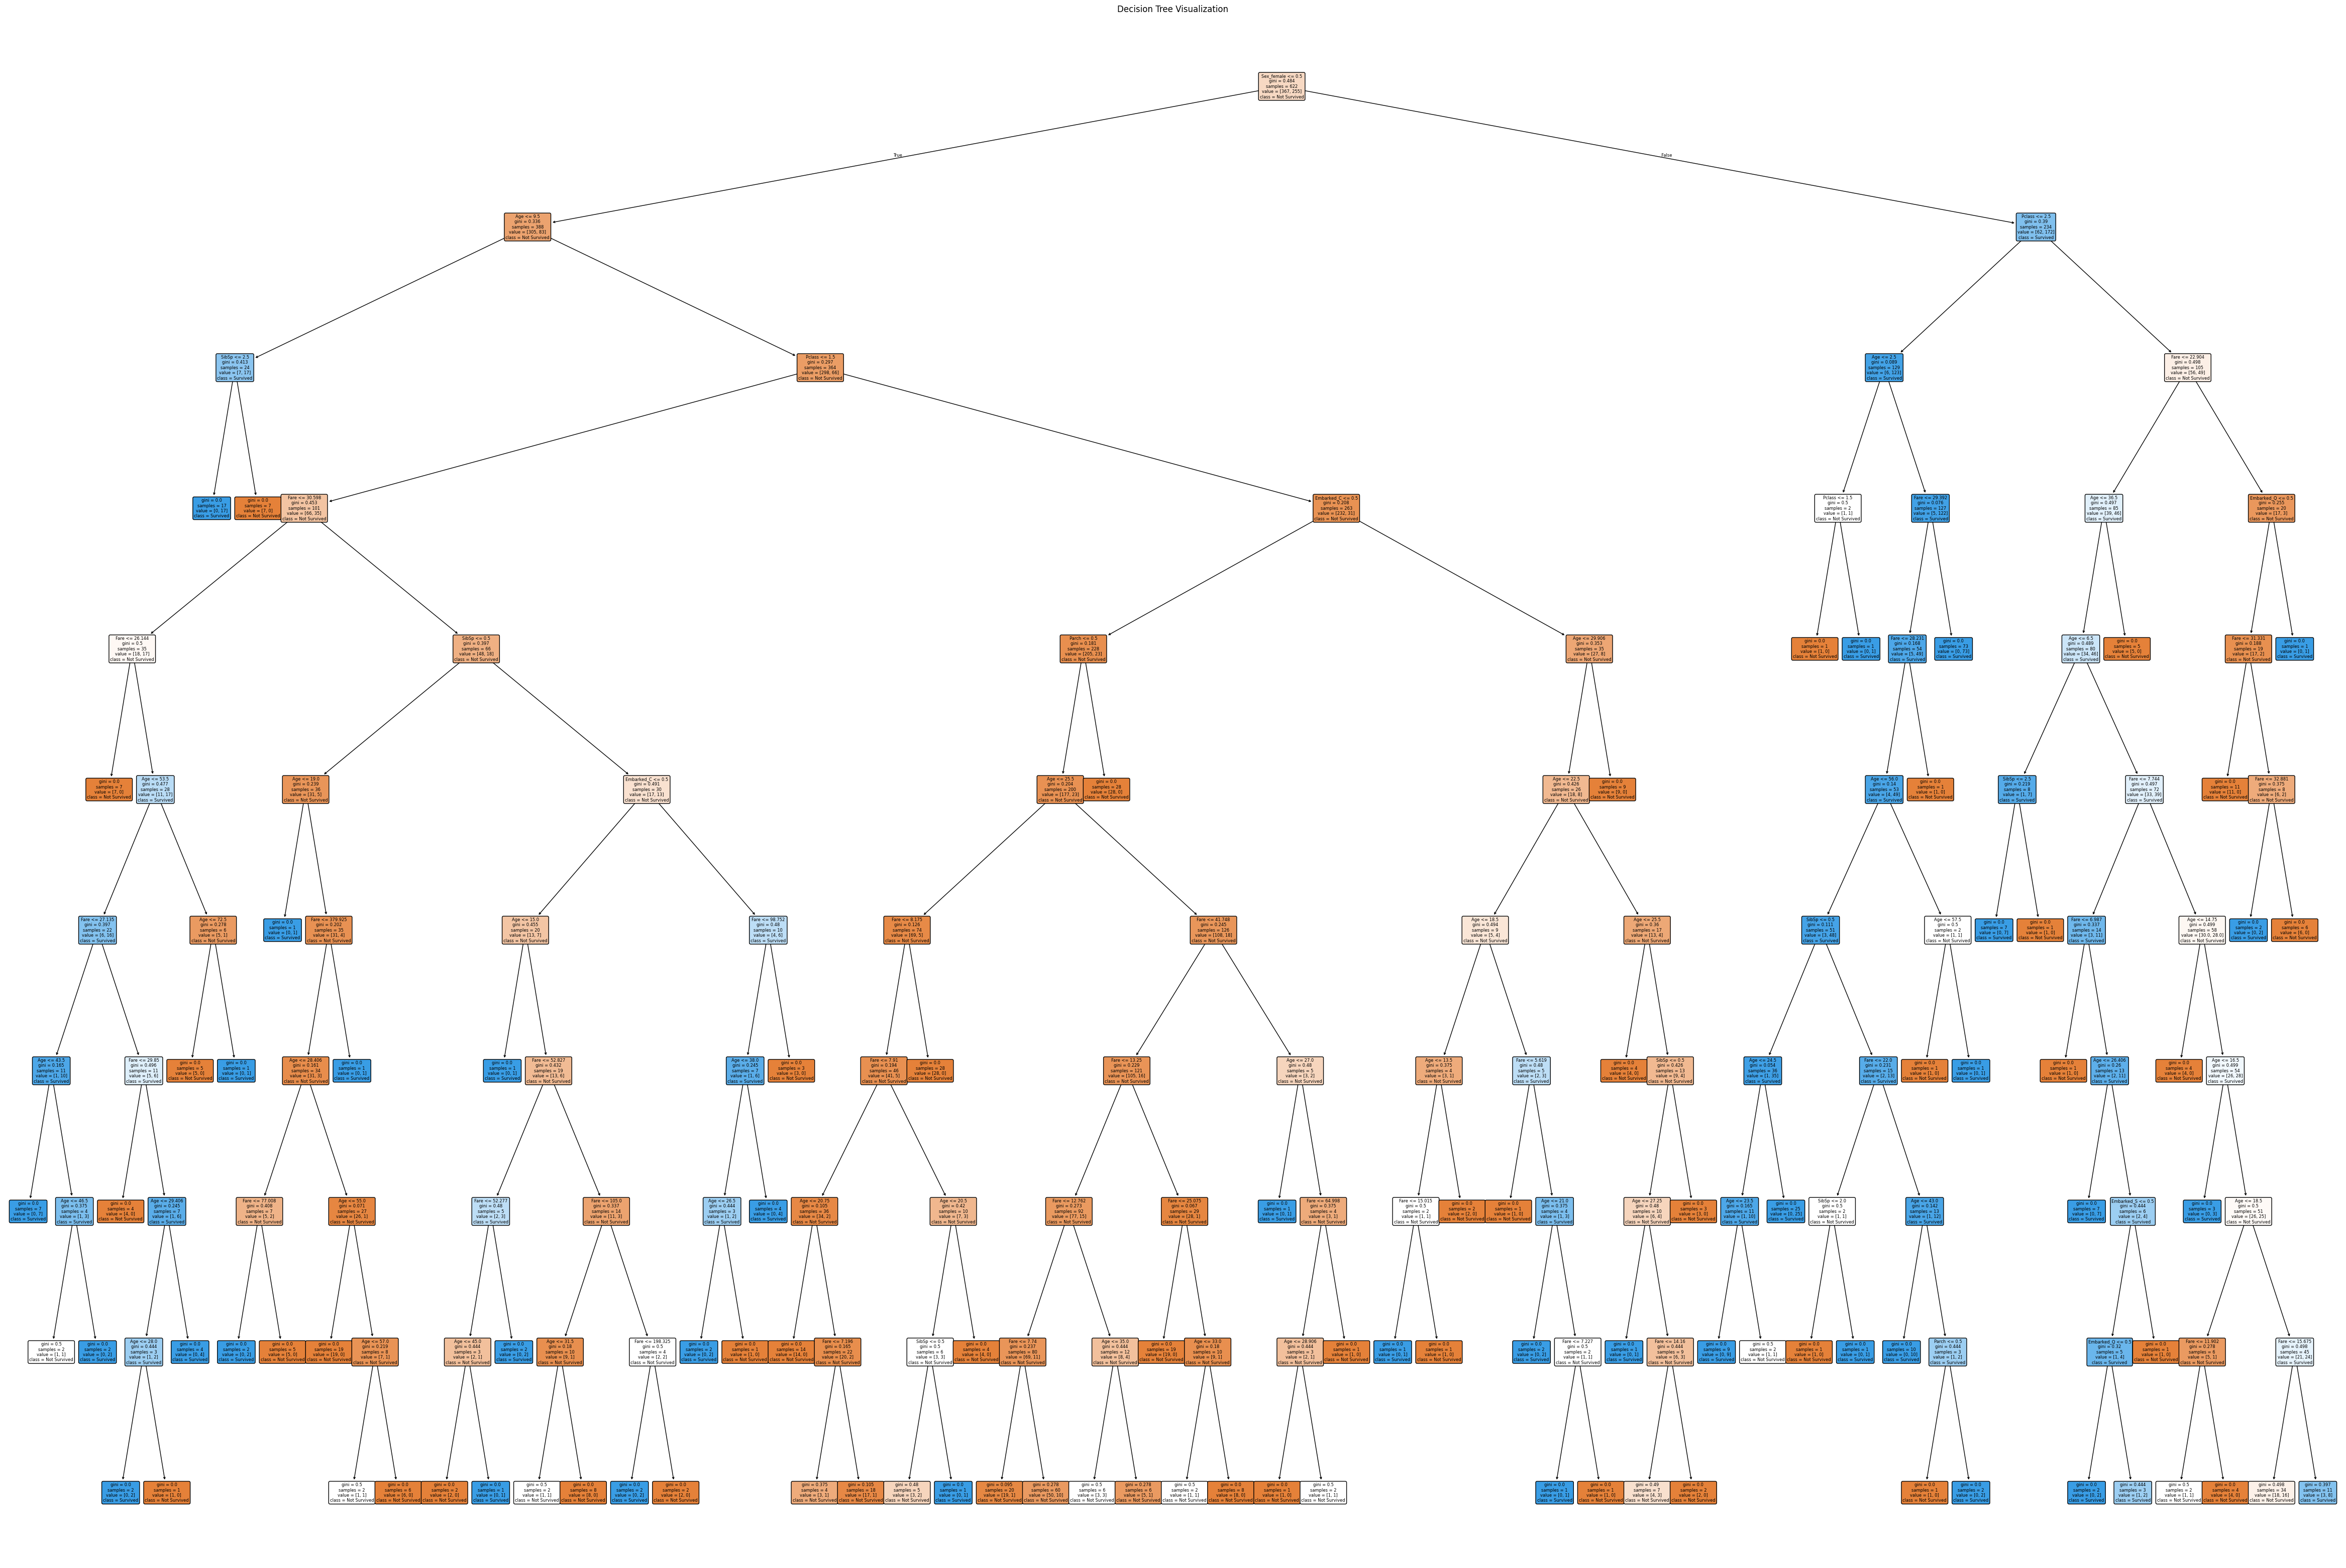

In [ ]:
# Implementing Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(criterion='gini', max_depth = 10, random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_dt))
#accuracy = no.of correctly predicted data / total test data

# Visualize the Decision Tree
plt.figure(figsize=(60, 40))
plot_tree(decision_tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

Random Forest Classifier Accuracy: 0.7884615384615384


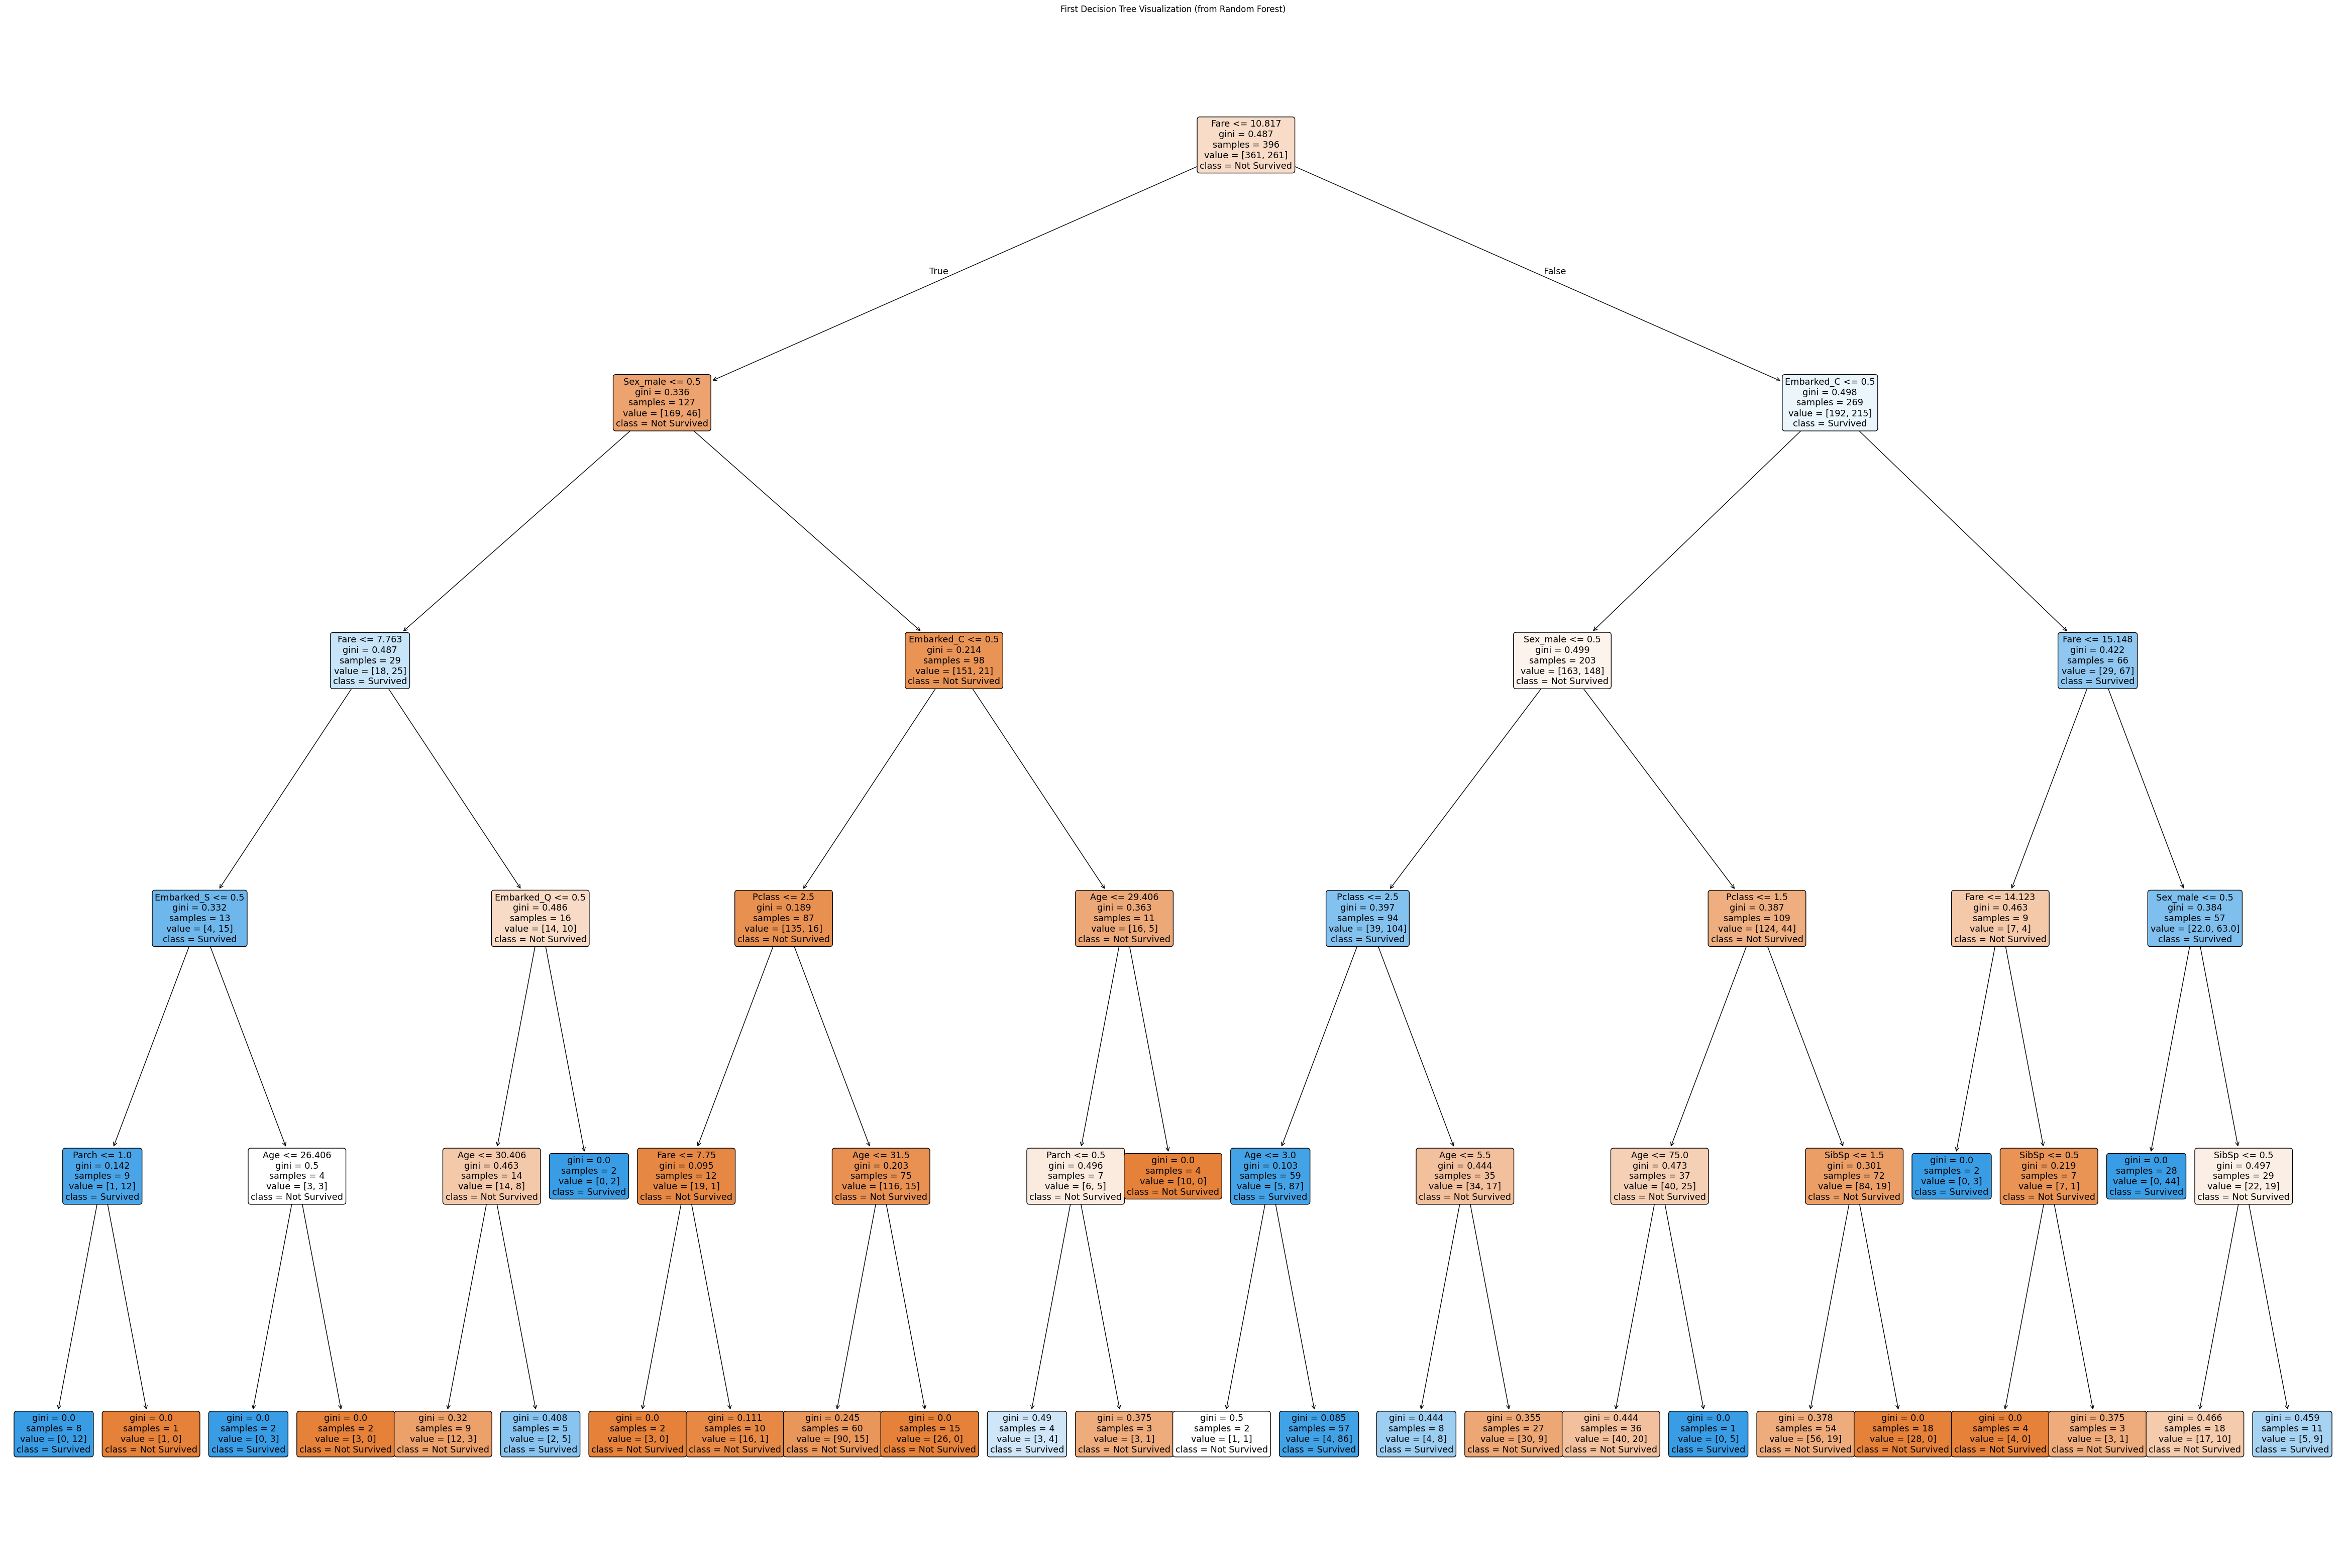

In [ ]:
# Implementing Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth = 5, criterion='gini', bootstrap=True, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))

# Visualize one of the decision trees (first tree) in the Forest
plt.figure(figsize=(60, 40))
plot_tree(random_forest_model.estimators_[0], feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.title('First Decision Tree Visualization (from Random Forest)')
plt.show()

# Implementing Decision Tree and Random Forest from Scratch

In [ ]:
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y, depth=0):
        if len(set(y)) == 1:
            return {'type': 'leaf', 'class': y[0]}

        if self.max_depth is not None and depth >= self.max_depth:
            majority_class = np.bincount(y).argmax()
            return {'type': 'leaf', 'class': majority_class}

        best_feature, best_threshold = self.find_best_split(X, y)

        if best_feature is None:
            majority_class = np.bincount(y).argmax()
            return {'type': 'leaf', 'class': majority_class}

        left_indices = X[:, best_feature] <= best_threshold
        right_indices = X[:, best_feature] > best_threshold

        left_node = self.fit(X[left_indices], y[left_indices], depth + 1)
        right_node = self.fit(X[right_indices], y[right_indices], depth + 1)


        return {
            'type': 'node',
            'feature': best_feature,
            'threshold': best_threshold,
            'left': left_node,
            'right': right_node,
        }

    def find_best_split(self, X, y):

        best_gini = float('inf')
        best_feature = None
        best_threshold = None

        for feature in range(X.shape[1]):
            unique_values = np.unique(X[:, feature])
            for threshold in unique_values:

                left_indices = X[:, feature] <= threshold
                right_indices = X[:, feature] > threshold


                left_labels = y[left_indices]
                right_labels = y[right_indices]

                if len(left_labels) > 0:
                    squared_proportions_left = []
                    for c in np.unique(y):
                        proportion_left = np.sum(left_labels == c) / len(left_labels)
                        squared_proportions_left.append(proportion_left ** 2)
                    sum_squared_proportions_left = sum(squared_proportions_left)
                    gini_left = 1 - sum_squared_proportions_left
                else:
                    gini_left = 0

                if len(right_labels) > 0:
                    squared_proportions_right = []
                    for c in np.unique(y):
                        proportion_right = np.sum(right_labels == c) / len(right_labels)
                        squared_proportions_right.append(proportion_right ** 2)
                    sum_squared_proportions_right = sum(squared_proportions_right)
                    gini_right = 1 - sum_squared_proportions_right
                else:
                    gini_right = 0

                gini_split = (len(left_labels) * gini_left + len(right_labels) * gini_right) / len(y)

                if gini_split < best_gini:
                    best_gini = gini_split
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def predict(self, node, x):
        if node['type'] == 'leaf':
            return node['class']

        if x[node['feature']] <= node['threshold']:
            return self.predict(node['left'], x)

        return self.predict(node['right'], x)


# Converting Pandas DataFrame to NumPy arrays
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

# Create the decision tree model and fit the training data
decision_tree = DecisionTree(max_depth=5)
final_tree = decision_tree.fit(X_train_np, y_train_np)

# Predict the classes of test instances
y_pred_dt_scr = np.array([decision_tree.predict(final_tree, instance) for instance in X_test_np])

# Calculate the accuracy manually
correct_predictions = np.sum(y_pred_dt_scr == y_test_np)
total_predictions = len(y_test_np)
accuracy_dt_scr = correct_predictions / total_predictions

# Print the accuracy
print("Decision Tree Classifier (from scratch) Accuracy:", accuracy_dt_scr)


Decision Tree Classifier (from scratch) Accuracy: 0.782051282051282


In [ ]:

class RandomForest:
    def __init__(self, n_estimators=100, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            indices = np.random.choice(len(X), size=len(X), replace=True)
            X_sample = X[indices]
            y_sample = y[indices]
            dt_model = DecisionTree(max_depth=self.max_depth)
            tree = dt_model.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):

        all_predictions = []
        for tree in self.trees:
            tree_predictions = []
            for instance in X:
                prediction = DecisionTree().predict(tree, instance)
                tree_predictions.append(prediction)
            tree_predictions = np.array(tree_predictions)
            all_predictions.append(tree_predictions)
        all_predictions = np.array(all_predictions).T

        majority_votes = []
        for predictions in all_predictions:
            vote_counts = np.bincount(predictions)
            majority_vote = vote_counts.argmax()
            majority_votes.append(majority_vote)
        return np.array(majority_votes)


# Create the model and fit the training data
random_forest = RandomForest(n_estimators=25, max_depth=5)
random_forest.fit(X_train_np, y_train_np)

# Predictions on the test set
y_pred_rf_scr = random_forest.predict(X_test_np)

# Calculate the accuracy like before
correct_predictions = np.sum(y_pred_rf_scr == y_test_np)
total_predictions = len(y_test_np)
accuracy_rf_scr = correct_predictions / total_predictions

print("Random Forest Classifier (from scratch) Accuracy:", accuracy_rf_scr)